# Loan Prediction Analysis Problem
##### Submitted by:  Yosef cohen & Idan rotshtein

Our project will focus on the biggest question (**it will be our research question**) at Loan market:<br>
* Does a random person who ask for a money as part of loan plan, will succeed to return the loan to the lender? **yes?** **no?** <br>

**This is exactly what we going to predict!**

## Background

When the company (in our case: LendingClub) receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.<br>

The data given contains the information about past loan applicants and whether they 'defaulted' or not.<br>
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Research Question + General Details

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss).<br>
The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.<br>
In this case, the customers labelled as 'charged-off' are the 'defaulters'.<br>

In addition, We know that our standard of living in growing, people are wasting more money for many reasons (we will see it later on).<br>
This brings a lot of people to ask for a money loan from various loan companies.<br>
Every company (as mentioned earlier) do not want to lose money and this is the point that we are getting into control.<br>

**We are going to "help" those loan companies (in our case: LendingClub) to have a better risk analytics about each person, identify these risky loan applicants and to predict if they should approve the loan to a random person or not.<br>**

## Data Description

Because of the fact that we are using a financial data that includes private data about people, we used exist dataset that was posted in one of the online loan companies at United State.<br>
The name of the company is: **LendingClub**<br>
We took the dataset and added additional data (scraping) in order to get interesting facts.

Here is the information on this particular data set:

|      | Loan Variables	    | Description |
| :-   | :-                 | :-          |
| 0    | loan_amnt	        | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term	        | The number of payments on the loan. Values are in months and can be either 36 or 60.|
| 2    | int_rate	        | Interest Rate on the loan.|
| 3    | installment	        | The monthly payment owed by the borrower if the loan originates.|
| 4    | grade	        | LC assigned loan grade.|
| 5    | sub_grade	        | LC assigned loan subgrade.|
| 6    | emp_title	        | The job title supplied by the Borrower when applying for the loan.|
| 7    | emp_length	        | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership		        | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.|
| 9    | annual_inc	        | The self-reported annual income provided by the borrower during registration.|
| 10    | verification_status	        | Indicates if income was verified by LC, not verified, or if the income source was verified.|
| 11    | issue_d	        | The month which the loan was funded.|
| 12    | loan_status	        | Current status of the loan.|
| 13    | purpose	        | A category provided by the borrower for the loan request.|
| 14    | title	        | The loan title provided by the borrower.|
| 15    | zip_code	        | The first 3 numbers of the zip code provided by the borrower in the loan application.|
| 16    | addr_state	        | The state provided by the borrower in the loan application.|
| 17    | dti	        | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18    | earliest_cr_line	        | The month the borrower's earliest reported credit line was opened.|
| 19    | open_acc	        | The number of open credit lines in the borrower's credit file.|
| 20    | pub_rec	        | Number of derogatory public records.|
| 21    | revol_bal	        | Total credit revolving balance.|
| 22    | revol_util	        | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23    | total_acc	        | The total number of credit lines currently in the borrower's credit file.|
| 24    | initial_list_status	        | The initial listing status of the loan. Possible values are – W, F.|
| 25    | application_type	        | 	Indicates whether the loan is an individual application or a joint application with two co-borrowers.|
| 26    | mort_acc		        | Number of mortgage accounts.|
| 27    | pub_rec_bankruptcies	        | Number of public record bankruptcies.|
| 28    | political_opinion	        | Political opinion of the borrower based on state location.|
| 29    | state	        | State shortcut name of the borrower.|



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    #roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, #plot_roc_curve
)

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

We will load our dataset from our .csv file to a dataframe:

In [5]:
data = pd.read_csv(r"lending_club_loan_dataset_with_political_opinion.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,political_opinion,state
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,15-Jan,Fully Paid,vacation,Vacation,26.24,1-Jun-90,16,0,36369,41.80,25,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690",Republican,OK
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,15-Jan,Fully Paid,debt_consolidation,Debt consolidation,22.05,4-Jul-22,17,0,20131,53.30,27,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",Republican,SD
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,15-Jan,Fully Paid,credit_card,Credit card refinancing,12.79,7-Aug-22,13,0,11987,92.20,26,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",Republican,WV
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,14-Nov,Fully Paid,credit_card,Credit card refinancing,2.60,6-Sep-22,6,0,5472,21.50,13,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813",Divided Government,MA
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,13-Apr,Charged Off,credit_card,Credit Card Refinance,33.95,1-Mar-99,13,0,24584,69.80,43,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650",Divided Government,VA


## Data Analysis

We want to understand which variables are important, view summary statistics, and visualize the data.

In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Let's start with understanding how much people succeed or not succeed to return the loan:

<AxesSubplot:xlabel='loan_status', ylabel='count'>

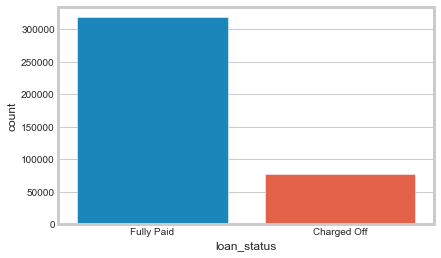

In [8]:
sns.countplot(x='loan_status', data=data)

In [9]:
fully_paid_weight = data.loan_status.value_counts()[0] / data.shape[0]
charged_off_weight = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {fully_paid_weight}")
print(f"Weight of negative values {charged_off_weight}")

Weight of positive values 0.8038709188697826
Weight of negative values 0.1961290811302174


We can see globally that **~80%** are succeeding and **~20%** are not succeeding to return the loan without penalties.

Now, let's find out the correlation between all the numeric variables.<br>
We will use heatmap plot that will demonstrate which column have more or less correlation:

<AxesSubplot:>

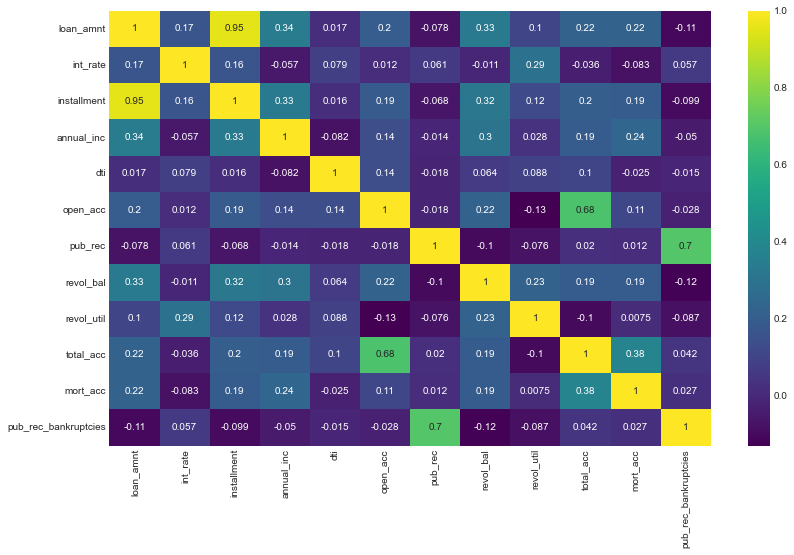

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')


**We can see that we got almost perfect correlation between ``loan_amnt`` with ``installment`` variables.**<br>
We'll explore this features further now: 

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

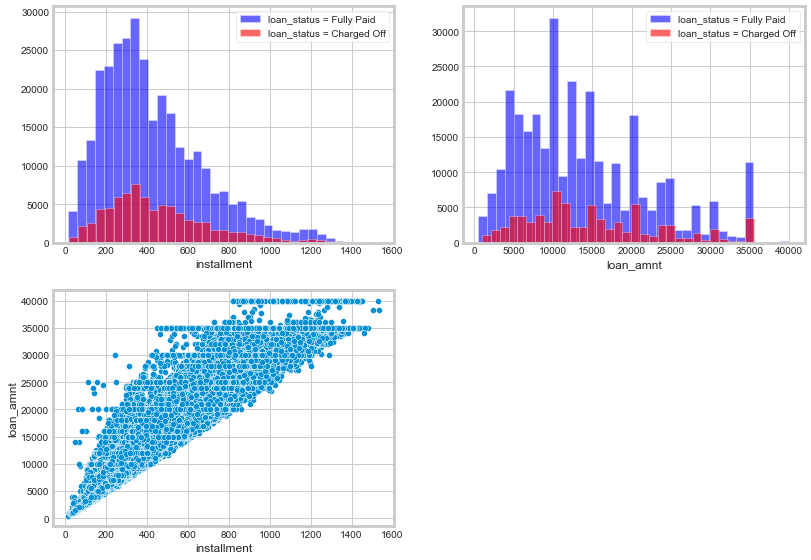

In [11]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=data)

* We can see that we have some outliers in the ``loan_amount`` while looking on the "Charged Off" values as part of ``loan_status`` column. These outliers will be fix later on (normalizing the data).
* We can see that the most people are taking a loan with **~300-450** installments.
* We can see that the most common loan amount is **~10,000$**.
* We can see from the installment histogram that as the number of installments is growing,  the success of returning the loan without any penelties is increasing too and vice versa.

In [1036]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


Now we will explore the ``Grade`` and ``SubGrade`` columns attributes.

In [1037]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


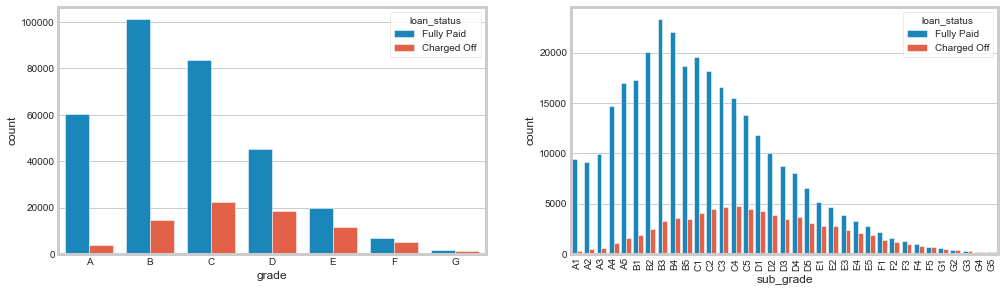

In [1038]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

We can see that ``F`` and ``G`` subgrades don't get paid back that often. 
Now we will isloate those and recreate the countplot just for those subgrades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

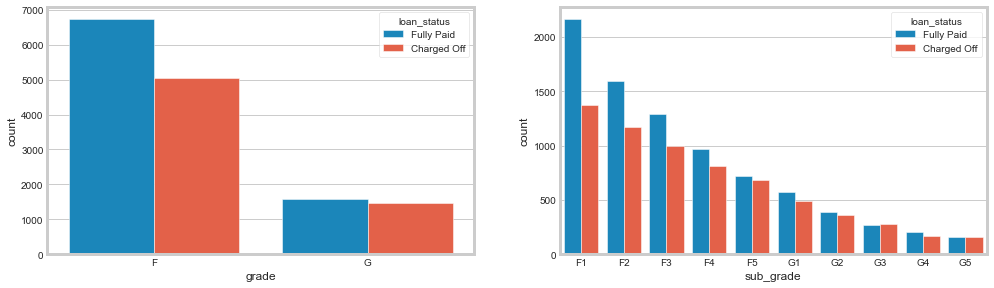

In [1039]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)


We will continue to explore ``term``, ``home_ownership``, ``verification_status`` and ``purpose`` columns attributes.

In [1040]:
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [1041]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

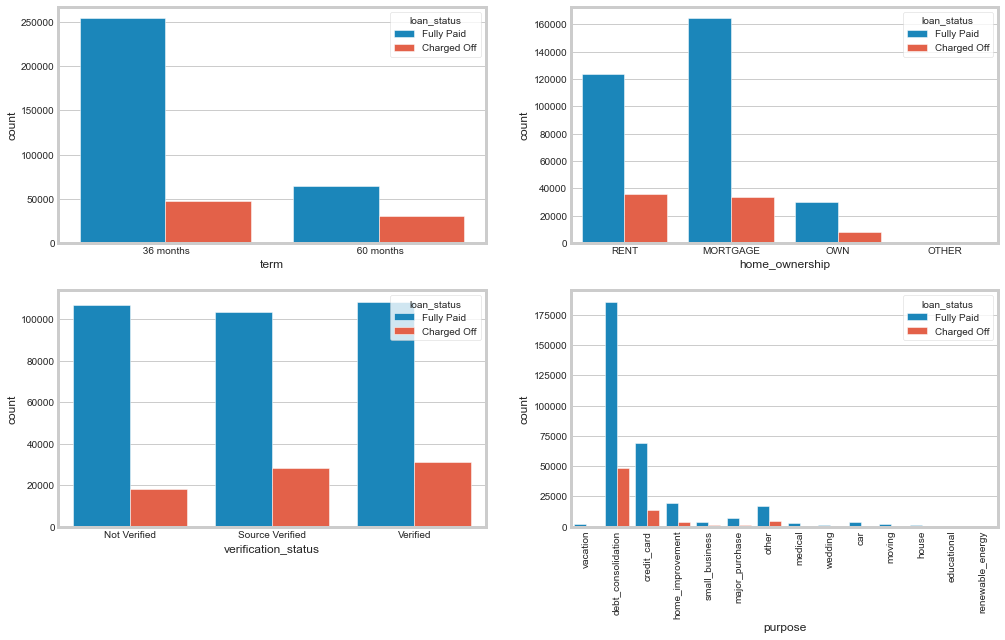

In [1042]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Those charts giving us interesting facts such as:
* There are a lot more people that take a loan for 36 months and not for 60 months.
* In addition, we can see that people with ``home_ownership``=**[RENT, MORTGAGE]** are more likely to take a loan.
* We can see that people that taking a loan with a ``purpose``=**debt_consilidation** have more chance to be charged off.
* ``purpose``=**[debt_consilidation, credit_card]** are the most common purposes for loans.

We will continue to explore ``int_rate`` ``annual_inc`` columns attributes.

Text(0.5, 0, 'annual_inc')

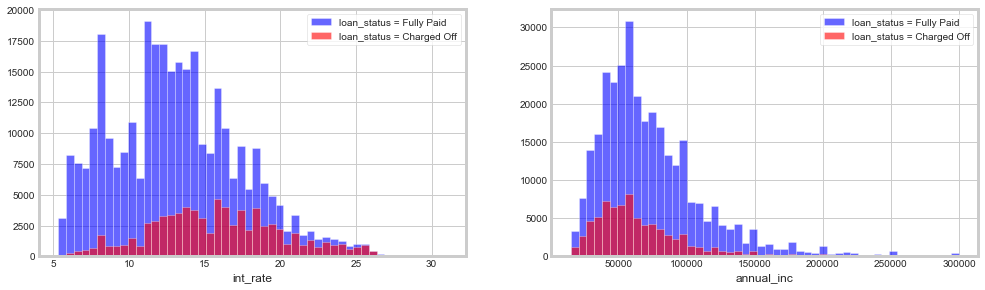

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=50, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=50, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
plt.hist(data[data["loan_status"] == "Fully Paid"]["annual_inc"], 50, range=[15000,300000], color='blue', label='loan_status = Fully Paid', alpha=0.6)
plt.hist(data[data["loan_status"] == "Charged Off"]["annual_inc"], 50, range=[15000,300000], color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

Those charts giving us interesting facts such as:
* We can see clearly that as much that the ``int_rate`` is higher, the chances not to succeed to return the loan without penalties is higher too.
* In addition, we can see that it's more common to take a loan when people's annual salaray  (``annual_inc``) is  between **~40,000 and ~60,000 dollars**.
* We can see more that as much people's annual salaray is higher, loan needs are decreased and vice versa.

In [1044]:
data[data.annual_inc >= 1000000].shape

(75, 29)

* Only 75 borrowers have an annual income more than 1 million.

We will continue to explore ``emp_title`` and ``emp_length`` columns attributes:

In [1045]:
data['emp_title'] = data.emp_title.str.lower()

In [1046]:
data.emp_title.value_counts()[:30]


manager                     5637
teacher                     5430
registered nurse            2627
supervisor                  2591
sales                       2382
driver                      2306
owner                       2201
rn                          2074
project manager             1776
office manager              1638
general manager             1461
truck driver                1288
director                    1192
engineer                    1188
police officer              1041
vice president               962
sales manager                961
operations manager           961
store manager                941
president                    877
administrative assistant     865
account manager              845
accountant                   845
technician                   839
mechanic                     753
attorney                     744
nurse                        738
analyst                      703
executive assistant          695
us army                      671
Name: emp_

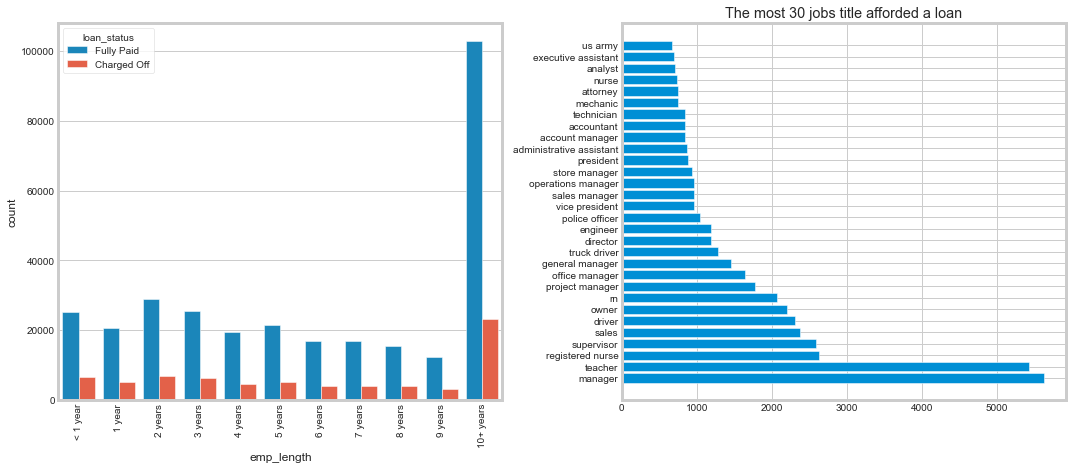

In [1047]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

Those charts giving us interesting facts such as:
* We can see that people with ``emp_lenth``=**"10+ years"** are way more likely to take a loan  and to succeed to pay loan's money.<br>
* We can see that people with job title such as ``emp_title``=**[manager, teacher]** are the most common to take a loan.

We will continue to explore ``title`` column attributes.

In [1048]:
data.title.isna().sum()

1755

In [1049]:
data['title'] = data.title.str.lower()

In [1050]:
data.title.value_counts()[:30]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
loan                           1150
payoff                         1035
credit cards                   1030
freedom                         934
debt                            933
my loan                         897
credit card loan                879
credit card                 

* We can remove ``title`` column because we have the same data on ``purpose`` column that can be generated from it (will be handled later as part of the **data pre-processing** stage).


We will continue to explore ``dti``, ``open_acc``, ``revol_bal``, ``revol_util`` and ``total_acc`` columns attributes.

In [1051]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [1052]:
data[data.open_acc > 40].shape

(217, 29)

In [1053]:
data[data.total_acc > 80].shape

(266, 29)

In [1054]:
data[data.revol_bal < 10000].shape

(177624, 29)

In [1055]:
data[data.revol_util > 200]
print(data["revol_util"])

0        41.80
1        53.30
2        92.20
3        21.50
4        69.80
          ... 
396025   34.30
396026   95.70
396027   66.90
396028   53.80
396029   91.30
Name: revol_util, Length: 396030, dtype: float64


Text(0.5, 0, 'total_acc')

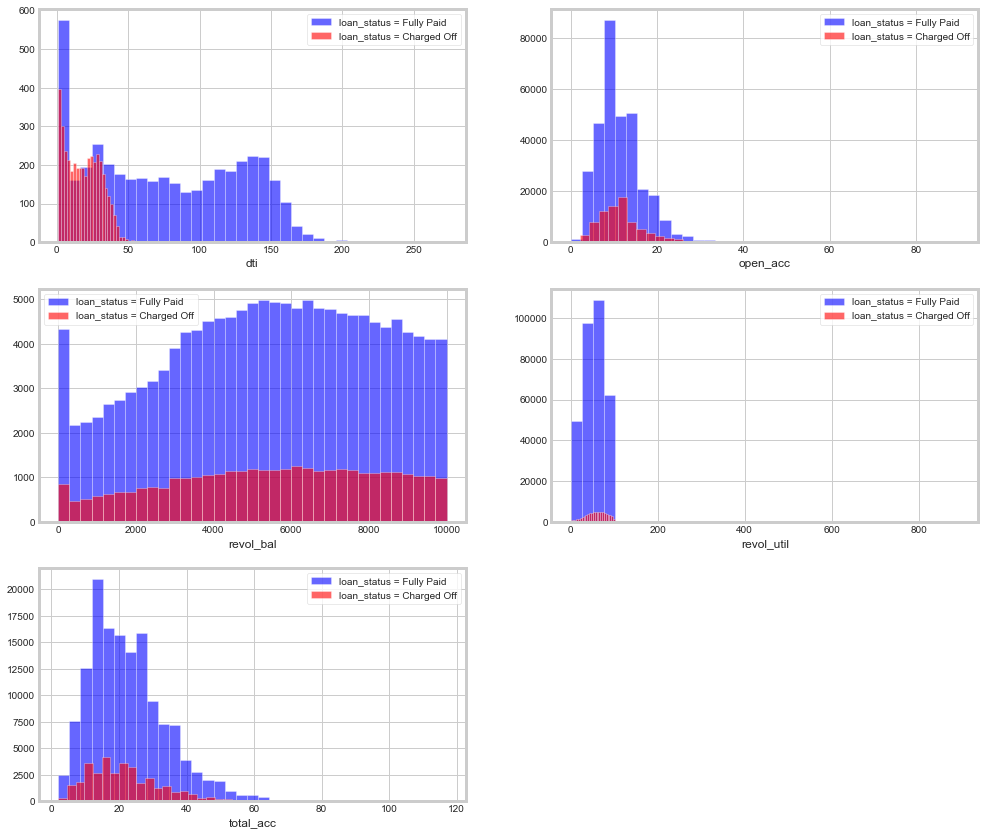

In [1056]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
data[data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
data[data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
data[data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")

* It seems that the smaller the ``dti`` the more likely that the loan will be paid with penalties.
* We can see that as ``revol_balance`` is increasing there is more chance to be charged off. (We not fully understand the meaning of ``revol_balance`` but we can defenetly see the impact of this variable)
* Only 217 borrower have more than 40 open credit lines.
* Only 266 borrower have more than 80 credit line in the borrower credit file.


We will continue to explore ``pub_rec``, ``initial_list_status``, ``application_type``, ``mort_acc`` and ``pub_rec_bankruptcies`` columns attributes.

In [1057]:
data.pub_rec.value_counts()

0     338272
1      49739
2       5476
3       1521
4        527
5        237
6        122
7         56
8         34
9         12
10        11
11         8
13         4
12         4
19         2
40         1
17         1
86         1
24         1
15         1
Name: pub_rec, dtype: int64

In [1058]:
data.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [1059]:
data.application_type.value_counts()


INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [1060]:
data.mort_acc.value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: mort_acc, dtype: int64

In [1061]:
data.pub_rec_bankruptcies.value_counts()

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

**-** ``pub_rec_bankruptcies`` is number of public record bankruptcies.<br>
**-** ``mort_acc`` is the number of mortgage accounts.<br>
**-** ``pub_rec`` is the number of derogatory public records.<br>

The data on those variables can move between **0** until **∞** (in theory).<br>
For us, it does not really matter if ``pub_rec_bankruptcies``/``mort_acc``/``pub_rec`` has the value of 1,2,3,....,∞.<br>
The only thing that matter on those variables is the value **0** or **<=1**.<br>
Therefore, we will convert the data like that:
* value >= 1 **==> 1** 
* value = 0  **==> 0**

Let's execute it:

In [1062]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [1063]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

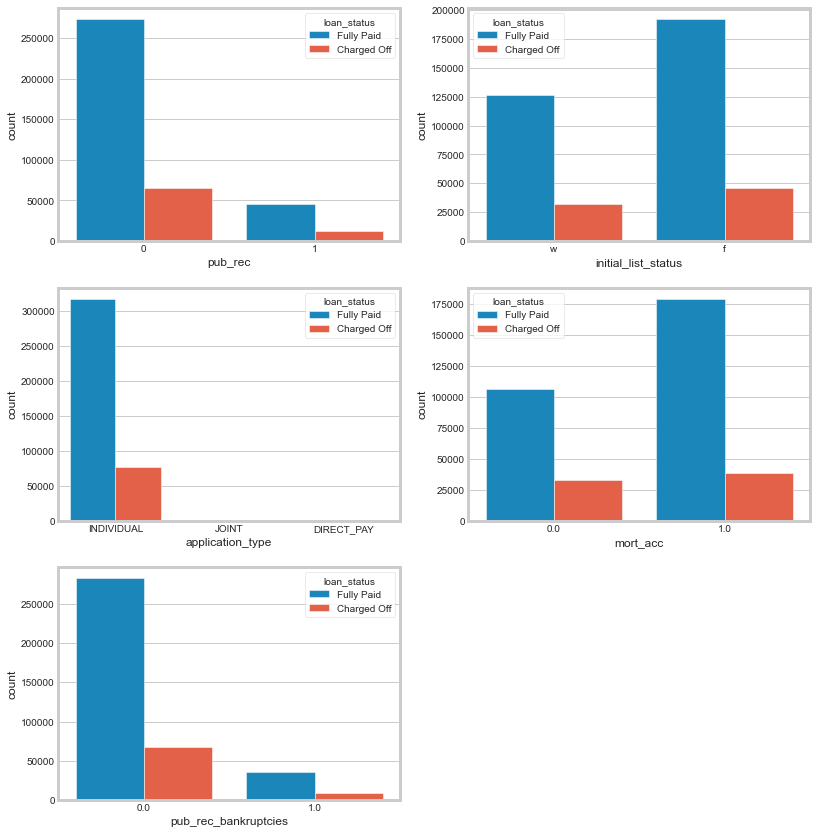

In [1064]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

* We can see that people with ``mort_acc``>=**1** are most likely to get a loan and to succeed to return the money without penalties.
* We can see that people with ``pub_rec_bankruptcies`` & ``pub_rec`` >=**1** are not going to ask for a loan compare to those who have ``pub_rec_bankruptcies`` & ``pub_rec`` = **0**
* We can see that the number of people that have ``initial_list_status`` = **'f'** is greater almost with x2 compare the number of people that have ``initial_list_status`` = **'w'**

We will continue to explore ``political_opinion`` and ``state`` columns attributes.

Let's see if there demographic/political ideas connection to loans.

<AxesSubplot:xlabel='state', ylabel='count'>

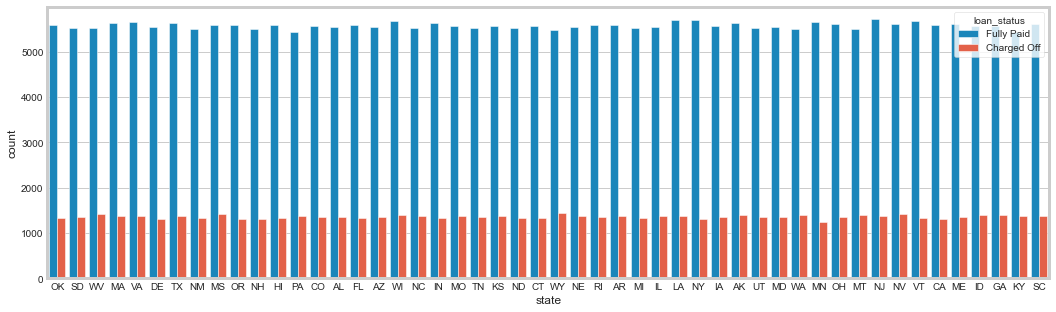

In [1065]:
plt.figure(figsize=(16, 5))
sns.countplot(x='state', data=data, hue='loan_status')

* We can see that the data scattering is close to be the same at every state.
* We can see almost the same count of "Fully Paid" against "Charged Off" loans per state.

<AxesSubplot:xlabel='political_opinion', ylabel='count'>

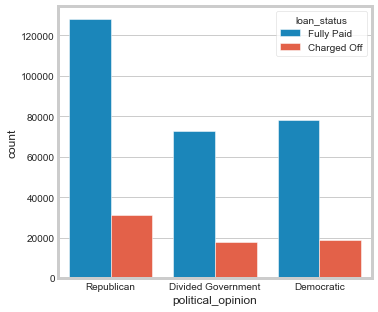

In [1066]:
plt.figure(figsize=(5, 5))
sns.countplot(x='political_opinion', data=data, hue='loan_status')

* We can see that "Republican" are more intent to ask for a loan than others (50% more than Democrats).  
* In addition, we can conclude that maybe Democrats are more "stable" and therefore they don't need much loans as "Repulicans".

Last thing, we want to check the correltion between ``loan_status`` and the other numeric columns.
* ``loan_status`` is a categorial variable
* we need to convert ``loan_status`` to be numeric variable

In [1067]:
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

<AxesSubplot:>

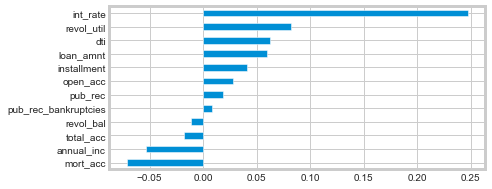

In [1068]:
plt.figure(figsize=(6, 3))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')


We can see that ``int_rate`` is the most correlation variable with ``loan_status``

### Mini high-level conclusion:

We saw that, there are 2 main types of variables:

* Variables related to the applicant (demographic variables such as occupation, employment details etc.),
* Variables related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

## Data Pre-Processing

### Our goals:

* Remove or fill any missing data.
* Remove unnecessary or repetitive features.
* Convert categorical string features to dummy variables.


In [1069]:
print(f"The Length of the data: {data.shape}")


The Length of the data: (396030, 29)


Let's check which columns have missing values and what is the percenege from the entire column for each one:

In [1070]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'
'political_opinion': number of missing values '49226' ==> '12.430%'
'state': number of missing values '49226' ==> '12.430%'


Let's observe at ``emp_title`` variable:

In [1071]:
data.emp_title.nunique()

154011

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [1072]:
data.drop('emp_title', axis=1, inplace=True)

Let's observe at ``emp_length`` variable:

In [1073]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [1074]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
0   0.82
1   0.18
Name: loan_status, dtype: float64
4 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
0   0.79
1   0.21
Name: loan_status, dtype: float64
6 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
9 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
2 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
3 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
8 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
7 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
5 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
1 year years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


Charge off/Fully paid rates are very similar across all employment lengths.<br>
Therefore, we are going to drop the ``emp_length`` column:

In [1075]:
data.drop('emp_length', axis=1, inplace=True)

Let's observe at ``title`` variable:

In [1076]:
data.title.value_counts().head()

debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [1077]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The ``title`` column is simply a string subcategory/description of the purpose column.<br>
This is a duplicate data so we will drop the ``title`` column.

In [1078]:
data.drop('title', axis=1, inplace=True)

Let's observe at ``mort_acc`` variable:

In [1079]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [1080]:
data.mort_acc.isna().sum()

37795

``mort_acc`` is an important variable for us.<br>
Therefore, we don't want to just drop the rows that contain the NaN values.<br>
In addition, we want to fill in those NaN values with an accurate value as much as we can.

So, to increase accuracy we are going to rearrage the dataframe and group it by ``total_acc`` (basically, we can group it by with other variables but to have the most accurate result we should take the variable with the most low NaN values)<br>
Then, we will create a function that will detected those NaN values and will replace them with the mean value of ``mort_acc`` at the specific group. (like a map)<br>

Let's execute it now:

In [1081]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [1082]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [1083]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Let's observe at ``revol_util``, ``pub_rec_bankruptcies``, ``political_opinion`` and ``state`` variables: 

In [1084]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'
'political_opinion': number of missing values '49226' ==> '12.430%'
'state': number of missing values '49226' ==> '12.430%'


* ``revol_util`` and ``pub_rec_bankruptcies`` have missing data, but they account for less than 0.5% of the total data. Therefore, we will remove the rows that are missing those values in those columns.
<br>
* ``state`` variable contains 4 military states that appears in the dataset.<br>
Military states are not part of the political opinion division.<br>
Therefore, every military state got the **"NaN"** value. <br>
In addition, if the military state got **"NaN"** so the ``political_opinion`` variable get **"NaN"** too.<br>
Let's see it now:

In [1085]:
data.political_opinion.isna().sum()

49226

In [1086]:
data.state.isna().sum()

49226

This data is not useful for our model and we can't fix it by mean value or the most common value, therefore we will drop ``political_opinion`` and ``state`` columns.<br>
In the end, we will drop ``revol_util``, ``pub_rec_bankruptcies``, ``political_opinion`` and ``state`` columns:

In [1087]:
data.dropna(inplace=True)

In [1088]:
data.shape

(346107, 26)

### Categorical Variables and Dummy Variables

Let's check if we have categorial variables:

In [1089]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address', 'political_opinion', 'state']


Let's observe at ``term`` variables: 

In [1090]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

We want to have the ability to work with ``term`` data so it will be more efficient to convert ``term`` from catergorial variable (string) to numeric variable (int):

In [1091]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [1092]:
data.term.unique()

array([36, 60], dtype=int64)

Let's observe at ``political_opinion`` variables: 

In [1093]:
data.political_opinion.unique()

array(['Republican', 'Divided Government', 'Democratic'], dtype=object)

We want to have the ability to work with ``political_opinion`` data so it will be more efficient to convert ``political_opinion`` from catergorial variable (string) to numeric variable (int):

In [1094]:
political_opinion_values = {'Republican': 2, 'Democratic': 1, 'Divided Government': 0}
data['political_opinion'] = data.political_opinion.map(political_opinion_values)

In [1095]:
data.political_opinion.unique()

array([2, 0, 1], dtype=int64)

Let's observe at ``grade`` and ``sub_grade`` and variables:

We know that ``grade`` is just a sub feature of ``sub_grade``.
This is a duplicate data, so we will drop it.

In [1096]:
data.drop('grade', axis=1, inplace=True)

All the rest variables are important to us.
Therefore we will convert them from categorial variables to dummy variables with ``get_dummies()`` method:

In [1097]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']

data = pd.get_dummies(data, columns=dummies, drop_first=True)


Let's observe at ``address`` variables: 

We want to extract the zip code value from the address column in the dataset.
Therefore, we will create a column called ``zip_code`` that will store zip_code values. 

In [1098]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [1099]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])  # save only last 5 chars 

In [1100]:
data.zip_code.value_counts()

70466    49795
30723    49417
22690    49204
48052    48931
00813    40135
29597    39844
05113    39651
11650     9764
93700     9717
86630     9649
Name: zip_code, dtype: int64

Now, we will convert them from categorial variables to dummy variables with ``get_dummies()`` method:

In [1101]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

After extracting ``zip_code`` data, we can drop ``address`` column:

In [1102]:
data.drop('address', axis=1, inplace=True)

Let's observe at ``issue_d`` variable:  

``issue_d`` is the month which the loan was funded.

Actually, we wouldn't know beforehand whether or not a loan would be issued when using our model, so don't really need it.
Therefore we will drop this column.

In [1103]:
data.drop('issue_d', axis=1, inplace=True)

Let's observe at ``earliest_cr_line`` variable:  


It's look like a historical timestamp variable. The only thing that is interesting here is the year in the variable value.
We will extract this data and then convert it to a numeric variable.

In [1104]:
x= data.earliest_cr_line.str.split('-', expand=True)[2]
print(x)
data['earliest_cr_line'] = x

0         90
1         22
2         22
3         22
4         99
          ..
396024    91
396026    22
396027    97
396028    90
396029    98
Name: 2, Length: 346107, dtype: object


In [1105]:
data.earliest_cr_line.nunique()

52

In [1106]:
data.earliest_cr_line.value_counts()

22    140437
00     25601
99     23116
98     19959
97     16376
       ...  
54         4
53         2
51         2
50         2
44         1
Name: earliest_cr_line, Length: 52, dtype: int64

In [1107]:
data.drop('state', axis=1, inplace=True)

### Train Test Split

In [1112]:
X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242274, 79)
(103833, 79)
(242274,)
(103833,)


### Normalizing the data:

In [1113]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## Models Building

In [1114]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

### Our Train algorithm - Random Forest Classifier

Random forests can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases.


In [1115]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_test_pred = rf_clf.predict(X_test)


Now, we will emphasize our prediction results with confusion_matrix plot:

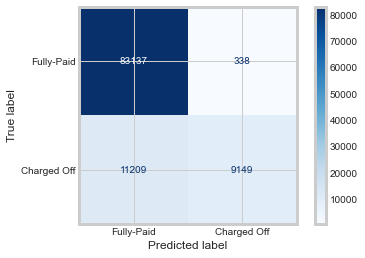

In [1120]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Charged Off'])

<br><br>**Confusion matrix information:**<br>

![](https://miro.medium.com/max/445/1*Z54JgbS4DUwWSknhDCvNTQ.png)

* **TP - True Positive:**<br>
    **Interpretation:** You predicted positive and it’s true.<br>
    You predicted that a woman is pregnant and she actually is.<br>
* **TN - True Negative:**<br>
    **Interpretation:** You predicted negative and it’s true.<br>
    You predicted that a man is not pregnant and he actually is not.<br>    
* **FP - False Positive:** (Type 1 Error)<br>
    **Interpretation:** You predicted positive and it’s false.<br>
    You predicted that a man is pregnant but he actually is not.<br>
* **FN - False Negative:** (Type 2 Error)<br>
    **Interpretation:** You predicted negative and it’s false.<br>
    You predicted that a woman is not pregnant but she actually is.<br>

After executing our train model and after predicting the values, we want to check our model.<br>
In order to do it, we will create a function that will include couple of method that will check our accuracy, f1_score and more.<br>
In order to do it, we will use built-in methods of sklearn.metrics.<br>

Let's do it:

In [1117]:
def print_score(true, pred):
    clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [1119]:
print_score(y_test, y_test_pred)

Test Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     0.96      0.89       0.92          0.90
recall        1.00     0.45      0.89       0.72          0.89
f1-score      0.94     0.61      0.89       0.77          0.87
support   83475.00 20358.00      0.89  103833.00     103833.00
_______________________________________________
Confusion Matrix: 
 [[83137   338]
 [11209  9149]]



# Conclusion

* We can see from the confusion matrix plot that our model succeed to predict effiently the result:
    * Our module predict that 83155 people will succeed to pay the loan without penalties (TP). <br>
    In the other hand, our model predict that **only** 320 people will not succeed to pay the loan **without** penalties but it's not actually true (FP). <br>
    So, in the end our model has right in the **Fully Paid** section with (83155/(83155+320))* 100 = **99.6%** of the cases while it didn't right with only **0.4%** of the cases.
    * Our module predict that 11165 people will not succeed to pay the loan without penalties (FN). <br>
    In the other hand, our model predict that 9193 people will succeed to pay the loan **without** penalties but it's not actually true (TN). <br>
    So, in the end our module has right in the **Charged Off** section with (11165/(11165+9193))* 100 = **54.8%** of the cases while it didn't right with only **45.2%** of the cases.
  
* From the conclusion, can be seen that that our prediction in the **Charged Off** section can get better.<br>
  So, for the next people who might continue our research, I will suggest to check other machine learning algorithms and to find which one is the best on both sections ("Fully Paid" and "Charged Off"). 